<a href="https://colab.research.google.com/github/sidms24/internship/blob/main/week%205/strain_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [475]:
seq = pd.read_csv("sequences.csv")
seq.columns

Index(['Accession', 'GenBank_RefSeq', 'Assembly', 'SRA_Accession', 'BioSample',
       'BioProject', 'Organism_Name', 'Species', 'Genus', 'Family', 'Genotype',
       'Isolate', 'Segment', 'GenBank_Title', 'Length', 'Nuc_Completeness',
       'Geo_Location', 'Country', 'Host', 'Tissue_Specimen_Source',
       'Submitters', 'Organization', 'Org_location', 'Publications',
       'Collection_Date', 'Release_Date', 'Molecule_type'],
      dtype='object')

In [476]:
from datetime import datetime

s = seq[['Accession','Organism_Name', 'Species' ,'Genotype','Country',
         'Host','Geo_Location','Collection_Date','Length', 'Release_Date']]

if s["Genotype"].isna().any():
  a = s['Organism_Name'].apply(lambda x: x.split(" ")[-1].split("/")[-1].strip(")").split('(')[-1])
l = s["Genotype"].isna()
for i in range(len(a)):
    if l[i] and a[i] != 'virus':
      s.iloc[i,3] = a[i]


for i in s['Organism_Name']:
  if i == "Influenza A virus (A/Wilson-Smith/1933(H1N1))":
    s.loc[s['Organism_Name'] == i, 'Collection_Date'] = '1933-07-08'
  elif i == "Influenza A virus (A/Scotland/15/2002(H1N2))":
    s.loc[s['Organism_Name'] == i, 'Collection_Date'] = '2001-12-24'

s.loc[(s['Organism_Name'] == 'Influenza A virus') & (s['Genotype'].isna()), 'Genotype'] = 'unknown'
s.isna().sum()

,0
Accession,0
Organism_Name,0
Species,0
Genotype,0
Country,0
Host,0
Geo_Location,1
Collection_Date,114
Length,0
Release_Date,0


In [477]:
s['Collection_Date'] = pd.to_datetime(s['Collection_Date'], errors='coerce')
s['Release_Date'] = pd.to_datetime(s['Release_Date'] )

def get_season(date):
  if date.month >= 9:
    return f"{date.year}/{str(date.year + 1)[-2:]}"
  elif date.month <= 8:
    return f"{date.year - 1}/{str(date.year)[-2:]}"
  else:
    return np.nan

s['season'] = s['Collection_Date'].apply(get_season)
s = s.sort_values(by='season', ascending=False)

In [478]:
s.isna().sum()

,0
Accession,0
Organism_Name,0
Species,0
Genotype,0
Country,0
Host,0
Geo_Location,1
Collection_Date,1650
Length,0
Release_Date,0


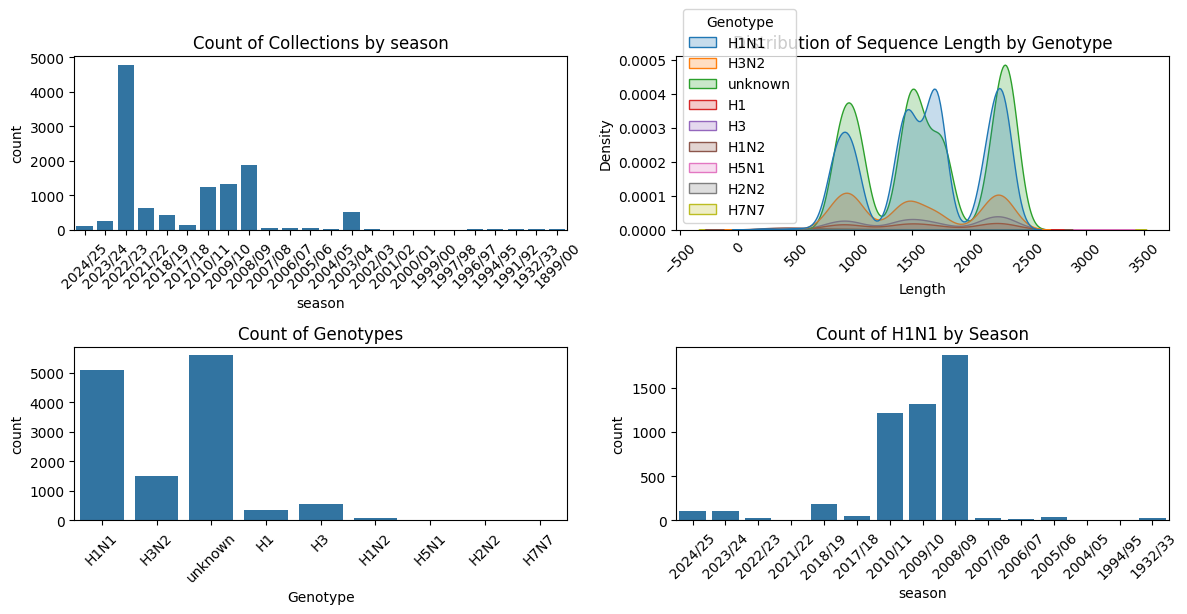

In [482]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.countplot(data=s, x='season', ax=axes[0, 0])
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_title('Count of Collections by season')

sns.kdeplot(data=s, x='Length', hue='Genotype', fill=True, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Distribution of Sequence Length by Genotype')

sns.countplot(data=s, x='Genotype', ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_title('Count of Genotypes')

sns.countplot(data=s[s["Genotype"] == "H1N1" ], x='season', ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_title('Count of H1N1 by Season')

plt.tight_layout()
plt.show()